# FBI NICS Firearm Background Check Data Exploration

## About this Dataset

The data in this repository comes from the [FBI's National Instant Criminal Background Check System](https://www.fbi.gov/services/cjis/nics). The National Instant Criminal Backgroung Check System, or NICS, was launched by the FBI in November 1998 and is used by Federal Firearms Licensees (FFLs) to quickly determine whether a customer is eligible to buy firearms or explosives. Before completeing the sale of a firearm, dealers must first determine whether or not the customer has a criminal record or is otherwise ineligible to own a firearm. Based on the most current statistics, between two and three million of these background checks are performed on a monthly basis throughout the United States.

The data begins in November of 1998 and contains every NICS background check by month and state until present day, March 2019. 

#### Some notes on the data:
These numbers do not include private gun sales, which often do not require a background check. It is important to note then that a study by Harvard researchers reported that about 40 percent of respondants had acquired their most recent firearm without having to go through a background check. If this number is representative of the number of background checks being performed versus the number of firearms being sold, the data from the FBI gives a very skewed representation of how many firearms are sold in the US on a monthly basis--those numbers would be nearly double the numbers from this dataset. 

Not all of these background checks are for the sale of firearms; many of them are for the issuance of permits.
Firearm sale laws vary from state to state as well, with some states, such as Kentucky, who has a law requiring a re-check every month for concealed carry permits, being over represented in the data. The FBI also notes that "Some states may reflect lower than expected numbers for handgun checks based on varying state laws pertaining to handgun permits. Since the permit check is done in place of the NICS check in most of the affected states, the low handgun statistics are often balanced out by a higher number of handgun permit checks."

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os
import seaborn as sb

BgChecks = pd.read_csv('nics-firearm-background-checks.csv',encoding = 'ISO-8859-1')

## Total Background Checks across the United States

Before we get into background checks in individual states or attempt to use this data to model the number of *guns sold* in the US, let's look at the big picture--every type of background check throughout the entire country. 

This first graph shows the most recent data we have on background checks in the US. This graph represents the sales from the past three years: March 2016 to March 2019.

(0, 35)

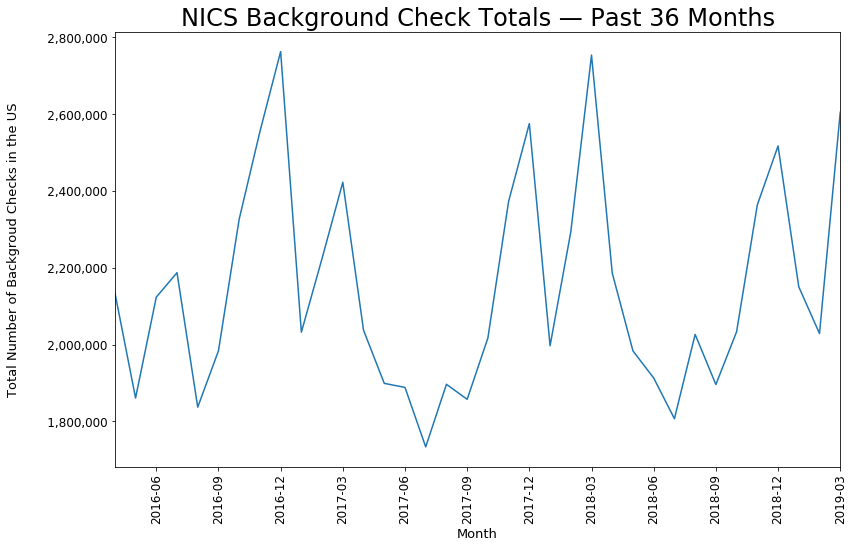

In [81]:
df = pd.DataFrame(BgChecks)

# Parsing month and year strings
BgChecks["year_int"] = BgChecks["month"].apply(lambda x: int(x.split("-")[0]))
BgChecks["month_int"] = BgChecks["month"].apply(lambda x: int(x.split("-")[1]))

latest_month_count = BgChecks.iloc[0]["month_int"] + (BgChecks.iloc[0]["year_int"] * 12)

# Adding up US totals for each month for the past 36 months
totals = BgChecks[(BgChecks["month_int"] + (BgChecks["year_int"] * 12)) > (latest_month_count - 12*3)].groupby("month")["totals"].sum()

#df1 = totals.to_frame()

# Setting up the plot
plt.figure(figsize=(13,8))
#ax = sb.lineplot(x="month", y="totals", data=BgChecks)
ax = sb.lineplot(x=totals.index.values, y=totals)

tick_placement = pd.np.arange(len(totals) - 1, 0, -3)

ax.set_title("NICS Background Check Totals — Past 36 Months", fontsize=24)
ax.set_xlabel("Month", fontsize=13)
ax.set_ylabel("Total Number of Backgroud Checks in the US", fontsize=13)

ax.set_xticks(tick_placement)
ax.set_xticklabels([ totals.index[i] for i in tick_placement ])

plt.setp(ax.get_xticklabels(), rotation=90, fontsize=12)

ax.set_yticklabels([ "{0:15,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xlim(0, len(totals) - 1)

The graph below gives a more comprehensive look at background checks performed throughout the US over the years since the NICS was born. It shows a distinctive upward trend that starts in 2006. Before 2006, the number of background checks appears to be relatively consistent. The large spikes in background checks at the end of each year is an interesting phenomenon as well--are there more gun sales towards the end of the year, or more background checks filed for some sort of clerical reason? Further research is needed to answer this question. The dramatic spikes in the number of background checks in years such as 2013 and 2016 are likely best explained by the addition of new background check laws either nationally or in particular states. Not all states participate fully in the national background check system either, and some states rely solely on thier state government for background checks. Let's look at the background check data organized by state to see if we can glean anything new from it. 

(0, 244)

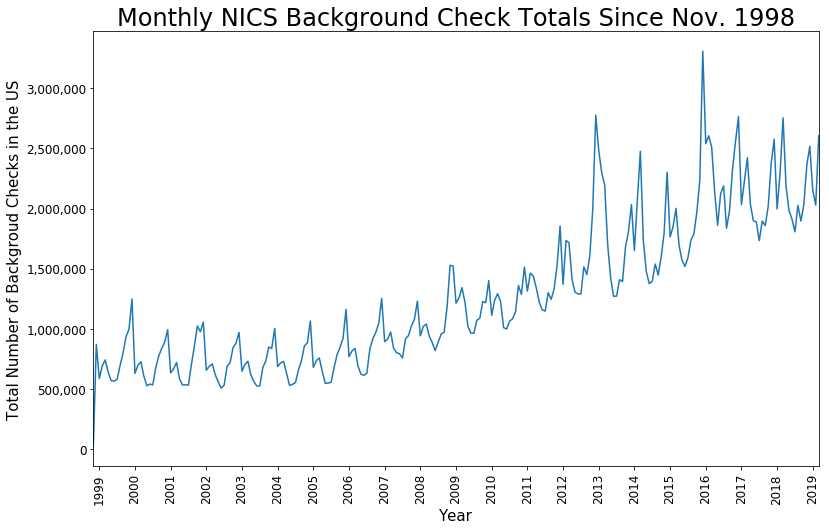

In [79]:
# Adding up the totals for each year
totals = BgChecks.groupby("month")["totals"].sum()

# Setting up the plot
tick_placement = pd.np.arange(2, len(totals), 12)
plt.figure(figsize=(13,8))
ax = sb.lineplot(x=totals.index.values, y=totals)

ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Total Number of Backgroud Checks in the US", fontsize=15)

ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_xticks(tick_placement)

ax.set_xticklabels([ totals.index[i].split("-")[0] for i in tick_placement ])
ax.set_xlim(0, len(totals) - 1)

In [104]:
# Adding up each state's total background checks since 1998

state_abbr = pd.read_csv('states.csv',encoding = 'ISO-8859-1')
abbr_df = pd.DataFrame(state_abbr)

st_totals = BgChecks.groupby("state",as_index=False)["totals"].sum()

territories = ('District of Columbia', 'Guam', 'Puerto Rico', 'Mariana Islands', 'Virgin Islands')

mask = np.logical_not(st_totals.state.isin(territories))
no_terr = st_totals[mask]

print(abbr_df.columns)
joined = pd.merge(abbr_df, no_terr, how='inner', on=['State', 'state'])

Index(['State', 'Abbreviation'], dtype='object')


KeyError: 'State'

Text(0, 0.5, 'Total Number of Backgroud Checks in Each State')

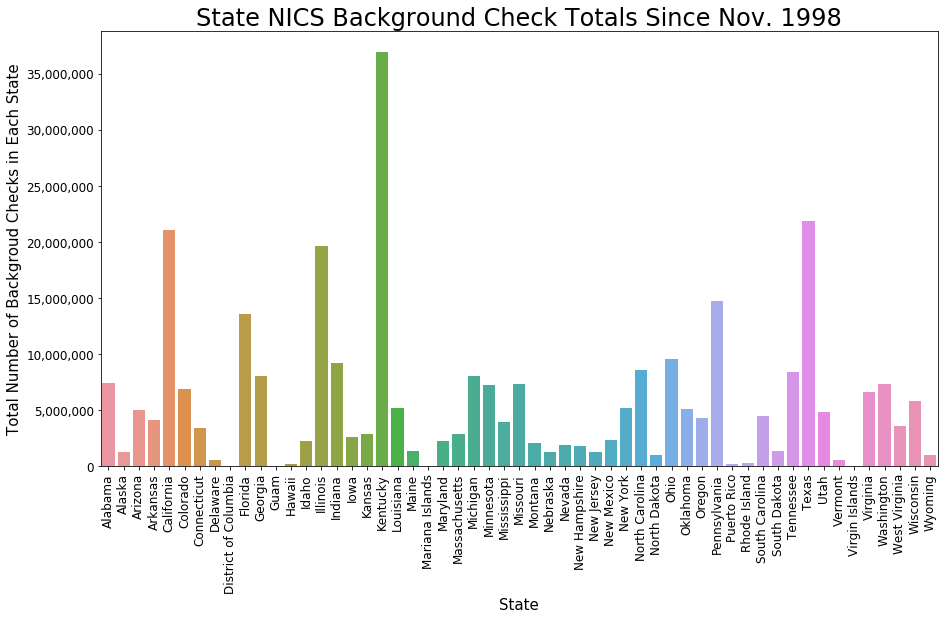

In [105]:
# Plotting the bar graph
plt.figure(figsize=(15,8))
ax = sb.barplot(x='state', y='totals', data=st_totals)

# Rotating x tick labels so state names don't overlap
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=12)

# Changing y tick labels to millions instead of scientific notation
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)

ax.set_title("State NICS Background Check Totals Since Nov. 1998", fontsize=24)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Total Number of Backgroud Checks in Each State", fontsize=15)


First let's go over some useful information and terms regarding individual states' compliance. There are three levels of participation in the NICS: 
    In states where the state government does not serve as a point of contact (POC) for background checks, Federal Firearms Licensees (the sellers, or FFLs) initiate a NICS background check by contacting the NICS Section for *all* firearm transfers. The NICS Section conducts the NICS checks and determines whether the transfer would violate state or federal law. These states are called **non-POC** states. 
    In states where the state government has agreed to serve as a POC for handgun transfers but not for long gun transfers (**partial POC**), FFLs contact the state for handgun transfers. FFLs in those states must contact the NICS Section for long gun transfers.
    In states where the state government has agreed to serve as a POC for both handgun and long gun transfers (**full POC**), FFLs contact the state for *all* firearm transfers. The POC initiates the NICS checks and determines whether the transfers would violate state or federal law. The map below is useful in determining which states are which.
    
<img src="NICS State Participation.png">

- **Full POC states** (contact state/territory for all firearm background checks, including permits): **California**, Colorado, Connecticut, Florida, **Hawaii**, Illinois, **Nevada**, New Jersey, Oregon, Pennsylvania, Tennessee, **Utah**, and Virginia.

- **Partial POC states** (contact state for handgun and FBI for long gun background checks): Maryland, New Hampshire, Washington, and Wisconsin.
- **Partial POC states (contact state for handgun permit and FBI for long gun background checks):** **Iowa**, **Nebraska**, and **North Carolina**.

- **Non-POC states/territories** (contact FBI for all firearm background checks): **Alabama**, **Alaska**, American Samoa, **Arizona**, **Arkansas**, Delaware, District of Columbia, **Georgia**, Guam, **Idaho**, Indiana, **Kansas**, **Kentucky**, **Louisiana**, Maine, Massachusetts, **Michigan**, Minnesota, **Mississippi**, Missouri, **Montana**, New Mexico, New York, **North Dakota**, Northern Mariana Islands, **Ohio**, Oklahoma, Puerto Rico, Rhode Island, **South Carolina**, **South Dakota**, **Texas**, Vermont, Virgin Islands, **West Virginia**, and **Wyoming**. 

Twenty-six states have at least one ATF-qualified alternate permit, which are issued by local or state agencies. These states are in **bold**. These are states in which permits qualify as alternatives to the background check requirements of the Brady law. The list of states with their alternative permits can be found [here](https://www.atf.gov/rules-and-regulations/permanent-brady-permit-chart).

This information is important to our data because it gives context to states that might have a skewed number of background checks recorded because of the laws regarding background checks in those states. Below I show the same graph with the number of background checks since 1998 grouped by state, but this time the states are grouped by their level of participation in the NICS.

How do I group the states by color on the graph according to which category they fall into

- Do background checks work?
https://annals.org/aim/fullarticle/2595892/firearm-acquisition-without-background-checks-results-national-survey
- Are there fewer gun deaths in states with stricter background check/gun laws?
- Population growth vs background check growth, have bg check laws gotten stricter

Let's compare the number of background checks per state to the number of gun deaths in each state. The CDC has compiled this [data](https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm) from each of the 50 states (excludes the District of Columbia and other US territories) from 2014-2017. Below we will add together these sets as data frames in order to perform a more comprehensive analysis.

In [94]:
States2014 = pd.read_csv('FIREARMS2014.csv',encoding = 'ISO-8859-1')
df2014 = pd.DataFrame(States2014)

States2015 = pd.read_csv('FIREARMS2015.csv',encoding = 'ISO-8859-1')
df2015 = pd.DataFrame(States2015)

States2016 = pd.read_csv('FIREARMS2016.csv',encoding = 'ISO-8859-1')
df2016 = pd.DataFrame(States2016)

States2017 = pd.read_csv('FIREARMS2017.csv',encoding = 'ISO-8859-1')
df2017 = pd.DataFrame(States2017)

StateTotals = pd.read_csv('statetotals.csv',encoding = 'ISO-8859-1')
dftotals = pd.DataFrame(StateTotals)


dfs = [df2014,df2015,df2016,df2017]
deaths_total = df2014['DEATHS'] + df2015['DEATHS'] + df2016['DEATHS'] + df2017['DEATHS']

dftotals['TOTAL DEATHS'] = deaths_total
dftotals['Total Background Checks'] = st_totals
print(dftotals)

#plt.figure(figsize=(12,7))
#ax1 = sb.stripplot(x="STATE", y="TOTAL DEATHS", data=dftotals, jitter=0.05, color='purple')
#ax2 = sb.stripplot(x='state', y='totals', data=st_totals, color='green')
#ax2 = ax1.twinx()

    
    
#ax = sb.scatterplot(x="STATE", y="TOTAL DEATHS", data=dftotals, jitter=0.05, color='purple')

ValueError: Wrong number of items passed 2, placement implies 1

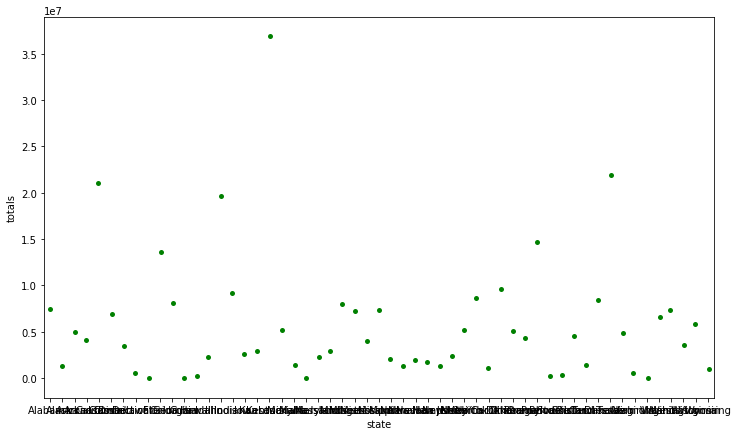

In [92]:
plt.figure(figsize=(12,7))
ax = sb.stripplot(x='state', y='totals', data=st_totals, color='green')